<a href="https://colab.research.google.com/github/notabd7/stock_predictor/blob/main/stock_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
start_date = '2013-01-01'
end_date = '2023-12-25'

ticker_symbol = 'GOOG'

data = yf.download(ticker_symbol, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace = True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2759,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800
2760,2023-12-19,138.000000,138.770004,137.449997,138.100006,138.100006,20661000
2761,2023-12-20,140.330002,143.078003,139.410004,139.660004,139.660004,33507300
2762,2023-12-21,140.770004,142.029999,140.473007,141.800003,141.800003,18101500


In [5]:
#moving average(mean) of 100 days
ma_100_days = data.Close.rolling(100).mean()
#lets do 200 & 300 days
ma_200_days = data.Close.rolling(200).mean()
ma_300_days = data.Close.rolling(300).mean()

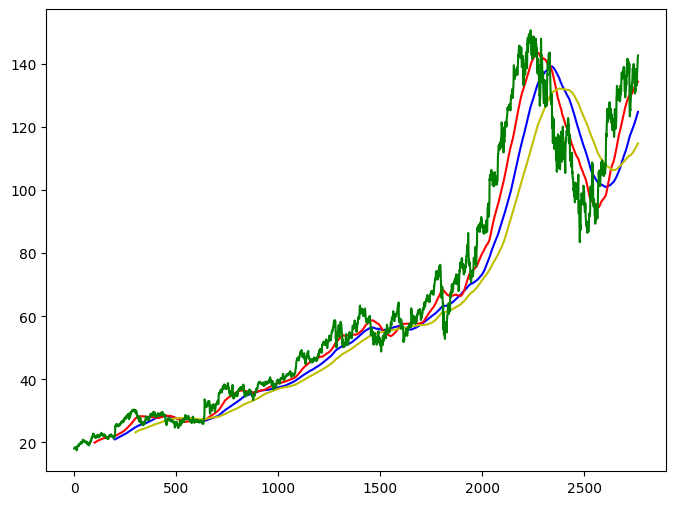

In [6]:
plot.figure(figsize=(8,6))
plot.plot(ma_200_days,  'b')
plot.plot(ma_100_days,  'r')
plot.plot(ma_300_days,  'y')
plot.plot(data.Close, 'g')
plot.show()

In [7]:
#lets get rid of null vals
data.dropna(inplace=True)

In [8]:
#distribute into test and training data
x = int(len(data)*0.8)
data_train = pd.DataFrame(data.Close[0:x])
data_test = pd.DataFrame(data.Close[x: len(data)])

In [9]:
data_train.shape[0] #training data

2211

In [10]:
data_test.shape[0] #dev data

553

In [11]:
from sklearn.preprocessing import MinMaxScaler #fit data in between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale = scaler.fit_transform(data_train)

In [13]:

#taking the first index to calculate the n+1 day stock price
#10, 11, 23, 15, 16, 17, 18, 19, 20, 17, 18
#to predict the n+1th day stick price it will take the data for the ndays
#lets take the first 100 days and predict price for 101

x = []
y = []

#array slicing
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [14]:
x, y = np.array(x), np.array(y)

In [15]:
#creating the model now
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM #independent layers that will be placed in a sequential model and the output of one layer will be the input of the second

In [25]:
model = Sequential()
z = x.shape[1]
#creating 4 layers, using relu as my activation function, return sequences = true means that the output of the preceeding layer will e the input of the succeeding layer.
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = ((z,1))))
#dropout makessure that we are not completely dependent on training (fitted to closely to training) so that it ownt be accurate for actual data. so we set a loss in our data where 20%
#of our data is not the actual data but the mean
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units =1)) #units =1 because our output is once predicted price

In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
model.fit(x, y, epochs = 50, batch_size=32, verbose =1)


Epoch 1/50
66/66 [==============================] - 25s 304ms/step - loss: 0.0201
Epoch 2/50
66/66 [==============================] - 23s 352ms/step - loss: 0.0044
Epoch 3/50
66/66 [==============================] - 22s 338ms/step - loss: 0.0044
Epoch 4/50
66/66 [==============================] - 21s 307ms/step - loss: 0.0033
Epoch 5/50
66/66 [==============================] - 21s 324ms/step - loss: 0.0032
Epoch 6/50
66/66 [==============================] - 19s 286ms/step - loss: 0.0041
Epoch 7/50
66/66 [==============================] - 21s 316ms/step - loss: 0.0031
Epoch 8/50
66/66 [==============================] - 19s 286ms/step - loss: 0.0027
Epoch 9/50
66/66 [==============================] - 20s 304ms/step - loss: 0.0030
Epoch 10/50
66/66 [==============================] - 19s 293ms/step - loss: 0.0031
Epoch 11/50
66/66 [==============================] - 20s 297ms/step - loss: 0.0023
Epoch 12/50
66/66 [==============================] - 20s 302ms/step - loss: 0.0024
Epoch 13/50
6

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [34]:
#testing the model now
past_100_days = data_train.tail(100)


In [35]:
data_test = pd.concat([past_100_days, data_test], ignore_index=True)

In [36]:
data_test


,Close
0,117.254997
1,120.333504
2,120.453499
3,121.676498
4,120.125504
...,...
648,137.190002
649,138.100006
650,139.660004
651,141.800003


In [37]:
data_test_scale = scaler.fit_transform(data_test)


In [41]:
x = []
y = []

#array slicing
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [42]:
x, y = np.array(x), np.array(y)

In [43]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 82ms/step


In [44]:
y_predict

array([[0.82543105],
       [0.8250537 ],
       [0.8255959 ],
       [0.8272539 ],
       [0.8301771 ],
       [0.834399  ],
       [0.8395161 ],
       [0.8450558 ],
       [0.849994  ],
       [0.85357386],
       [0.85564685],
       [0.8572943 ],
       [0.8595227 ],
       [0.8630895 ],
       [0.8676272 ],
       [0.8727425 ],
       [0.87823963],
       [0.8841745 ],
       [0.8906024 ],
       [0.8974209 ],
       [0.90438   ],
       [0.910842  ],
       [0.91629416],
       [0.9208907 ],
       [0.92491794],
       [0.92852193],
       [0.9317653 ],
       [0.9348706 ],
       [0.93792707],
       [0.94060665],
       [0.94257504],
       [0.94370097],
       [0.94360244],
       [0.9424185 ],
       [0.9401853 ],
       [0.9368309 ],
       [0.93270546],
       [0.9281396 ],
       [0.9235237 ],
       [0.9196282 ],
       [0.91711456],
       [0.91624343],
       [0.9169776 ],
       [0.91878706],
       [0.9208458 ],
       [0.9228086 ],
       [0.9243357 ],
       [0.924

In [46]:
#values were fitted between 0 amd 1 so lets convert back to original price

In [50]:
scale = 1/scaler.scale_

In [51]:
y_predict = y_predict * scale

In [52]:
y  = y*scale

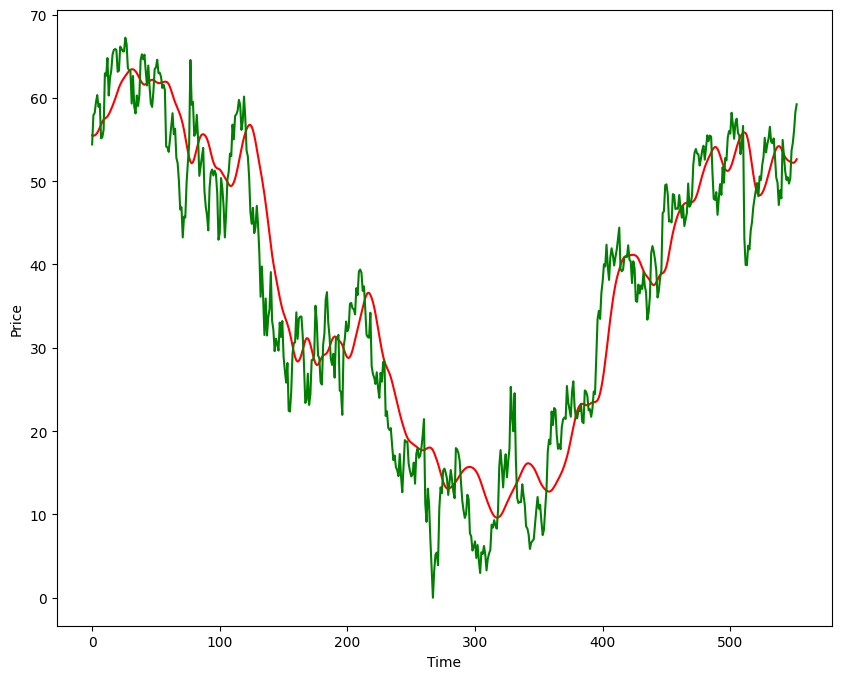

In [57]:
#visualizing
plot.figure(figsize=(10,8))
plot.plot(y_predict, 'r', label = "Prediction")
plot.plot(y, 'g', label = "Actual")
plot.xlabel("Time")
plot.ylabel("Price")
plot.legend
plot.show()

In [58]:
model.save('Stock Predictor Model.keras')